## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from scipy.stats import pearsonr
import warnings; warnings.filterwarnings("ignore")

In [2]:
# check the version of matplot
matplotlib.__version__

'3.7.0'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

## Importing Dataframe

In [4]:
df=pd.read_pickle('../Prepared Data/df_clean.pkl')

## Exploring the data

In [5]:
df.shape

(1337, 8)

In [6]:
df.columns

Index(['Age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges',
       'Price category'],
      dtype='object')

In [7]:
df.dtypes

Age                 int64
sex                object
BMI               float64
children            int64
smoker             object
region             object
charges           float64
Price category     object
dtype: object

In [8]:
# checking for duplicate 
df_dups = df[df.duplicated()]

In [9]:
df_dups.shape

(0, 8)

In [10]:
# Check for missing values
print(df.isnull().sum())

Age               0
sex               0
BMI               0
children          0
smoker            0
region            0
charges           0
Price category    0
dtype: int64


In [11]:
# check for mixed data
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

### Exploring Relationships

In [12]:
# Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap Matrix')

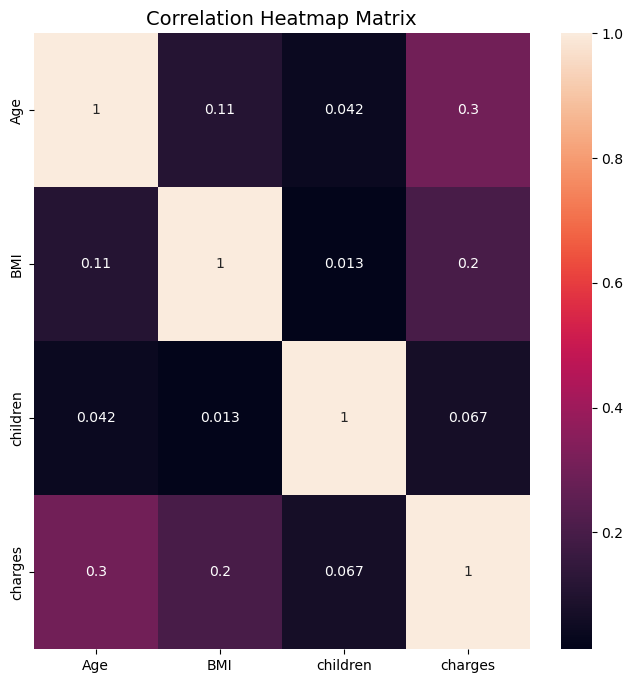

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.title('Correlation Heatmap Matrix', fontsize=14) # add title

In [14]:
# scatterplot

Text(0.5, 1.0, 'scatterplot for Age and BMI')

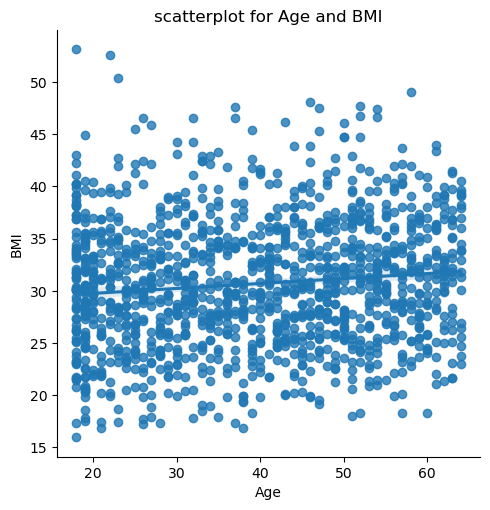

In [15]:
# Create a scatterplot for the "Age" and "BMI" columns in seaborn
sns.lmplot(x = 'Age', y = 'BMI', data = df)
plt.title('scatterplot for Age and BMI') # add title

Text(0.5, 1.0, 'scatterplot for Age and Children')

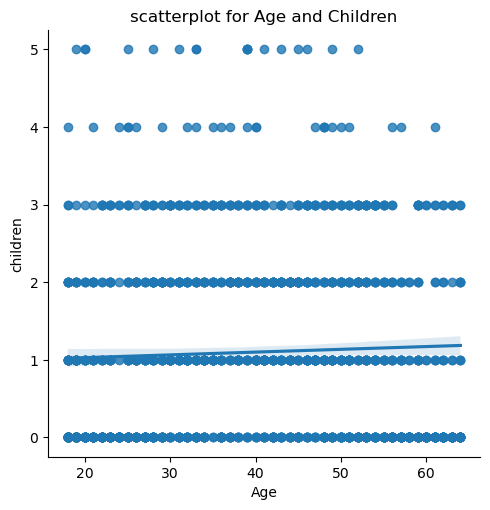

In [16]:
# Create a scatterplot for the "Age" and "children" columns in seaborn
sns.lmplot(x = 'Age', y = 'children', data = df)
plt.title('scatterplot for Age and Children') # add title

Text(0.5, 1.0, 'Scatterplot for Age and charges')

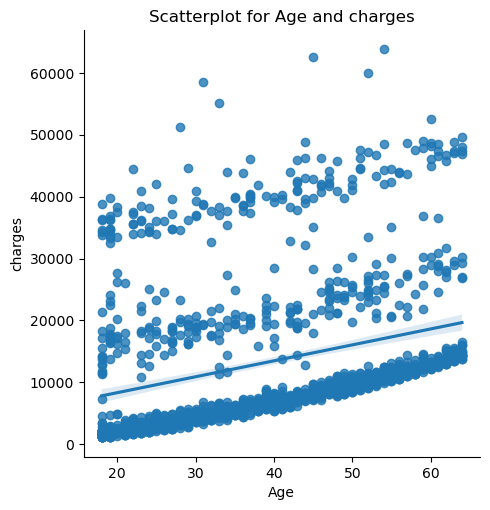

In [17]:
# Create a scatterplot for the "Age" and "charges" columns in seaborn
sns.lmplot(x = 'Age', y = 'charges', data = df)
plt.title('Scatterplot for Age and charges') # add title

Text(0.5, 1.0, 'Scatterplot for BMI and charges')

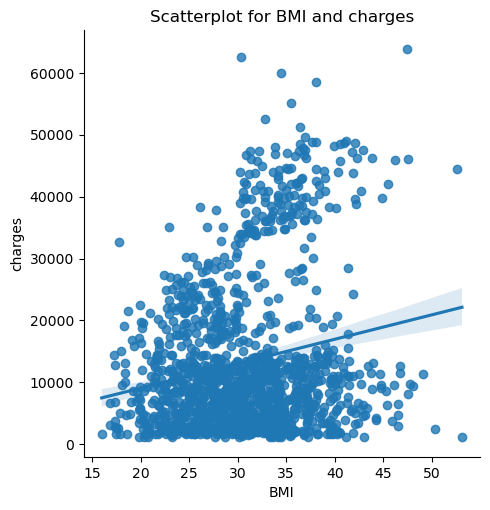

In [18]:
# Create a scatterplot for the "BMI" and "charges" columns in seaborn
sns.lmplot(x = 'BMI', y = 'charges', data = df)
plt.title('Scatterplot for BMI and charges') # add title

Text(0.5, 1.0, 'Scatterplot for BMI and children')

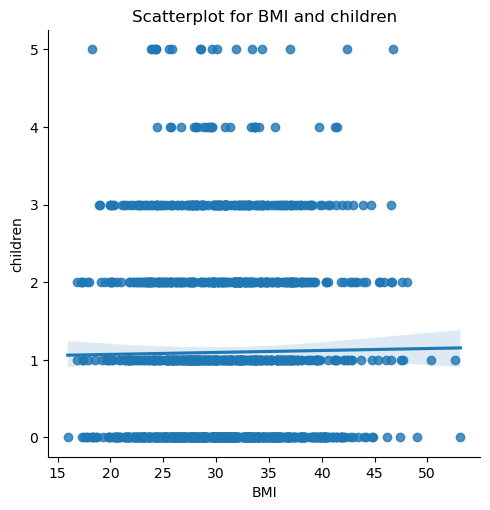

In [19]:
# Create a scatterplot for the "BMI" and "children" columns in seaborn
sns.lmplot(x = 'BMI', y = 'children', data = df)
plt.title('Scatterplot for BMI and children') # add title

Text(0.5, 1.0, 'Scatterplot for children and charges')

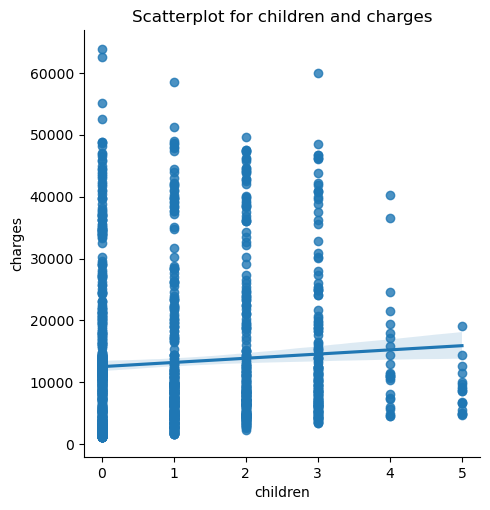

In [20]:
# Create a scatterplot for the "children" and "charges" columns in seaborn
sns.lmplot(x = 'children', y = 'charges', data = df)
plt.title('Scatterplot for children and charges') # add title

In [21]:
# Pair Plot

Text(0.5, 1.0, 'Pair Plot')

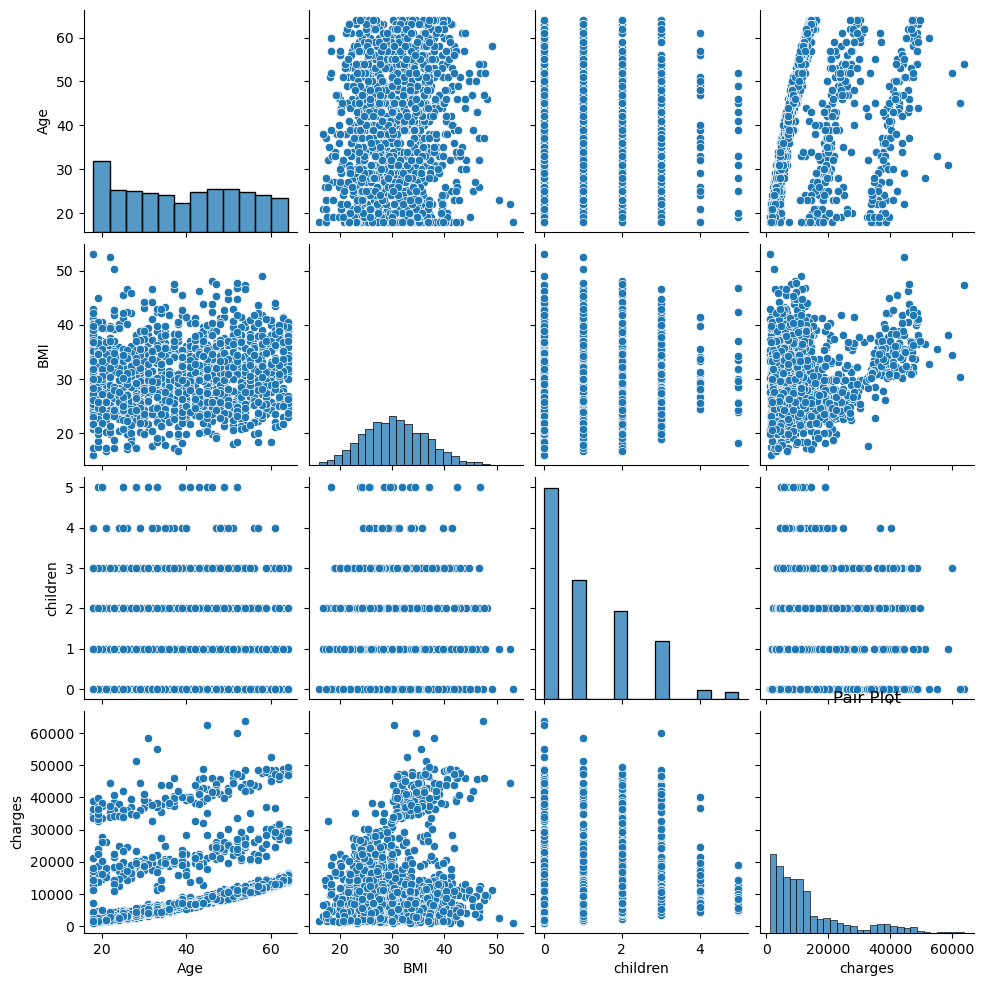

In [22]:
# Create a pair plot of entire dataset
g = sns.pairplot(df)
plt.title('Pair Plot') # add title

Histograms are used in the analysis to visualise the distribution of variables along diagonal cells, revealing their form, spread, and central tendency. **The age variable has a uniform distribution,** whereas **the BMI variable has a moderate right skew**, the children variable has a significant right skew, and the charges variable has a substantially right-skew distribution. Scatter plots in off-diagonal cells demonstrate a positive relationship between age and charges, a weak relationship between body mass index and charges, and a negative relationship between children and charges. **There is no evident relationship between age and BMI or age and children.**

In [23]:
# Categorical Plots

Text(0.5, 1.0, 'Histogram for Age')

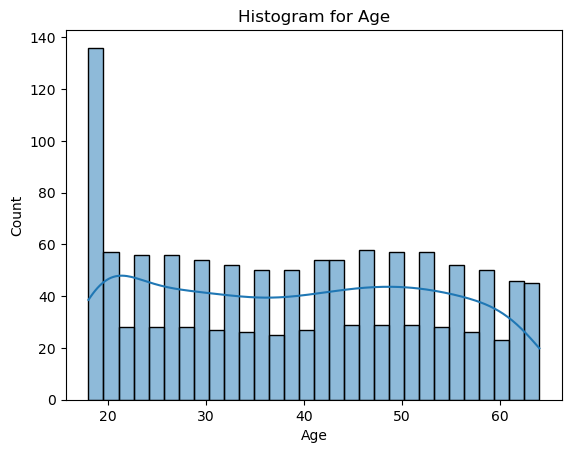

In [24]:
#See the distribution of 'Age'
sns.histplot(df['Age'], bins = 30, kde = True)
plt.title('Histogram for Age') # add title

Text(0.5, 1.0, 'Histogram for BMI')

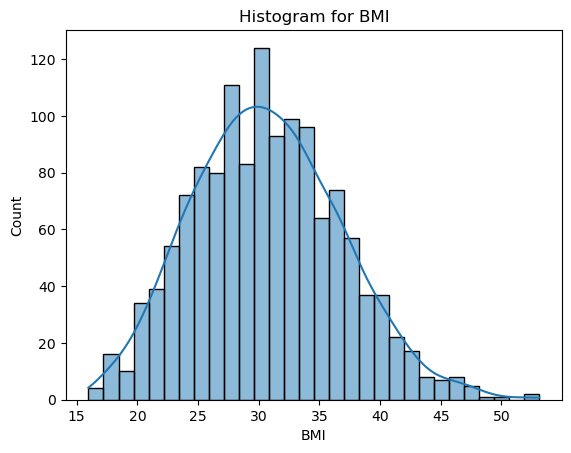

In [25]:
#See the distribution of 'BMI'
sns.histplot(df['BMI'], bins = 30, kde = True)
plt.title('Histogram for BMI') # add title

Text(0.5, 1.0, 'Histogram for children')

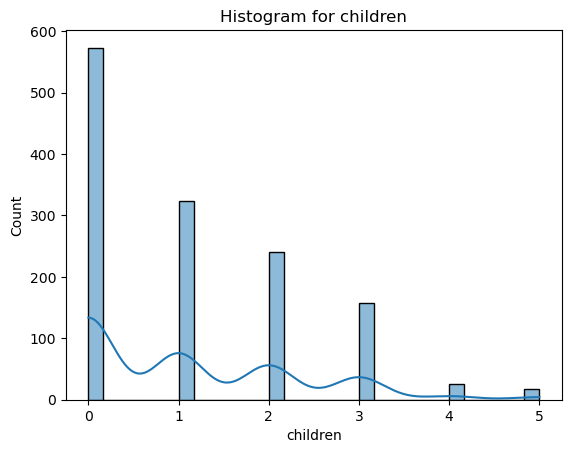

In [26]:
#See the distribution of 'children'
sns.histplot(df['children'], bins = 30, kde = True)
plt.title('Histogram for children') # add title

Text(0.5, 1.0, 'Histogram for charges')

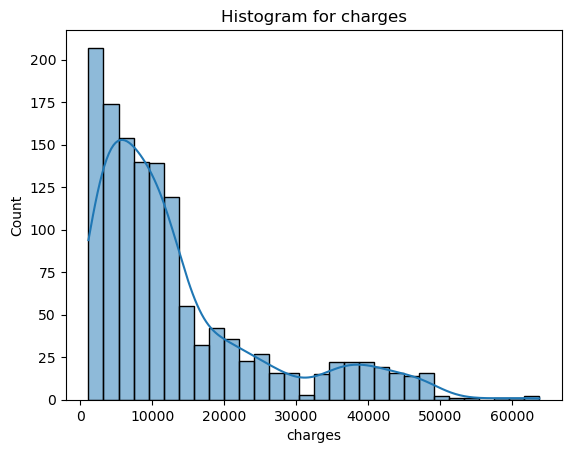

In [27]:
#See the distribution of 'charges'
sns.histplot(df['charges'], bins = 30, kde = True)
plt.title('Histogram for charges') # add title

In [28]:
# Create the 'Price category' column based on 'charges' values
#df.loc[df['charges'] < 20, 'Price category'] = 'Low price'
#df.loc[(df['charges'] >= 20) & (df['charges'] < 50), 'Price category'] = 'Middle price'
#df.loc[df['charges'] >= 50, 'Price category'] = 'High price'

In [29]:
# Define the threshold values
max_threshold = 63770.42801
median_threshold = 9386.1613
min_threshold = 1121.8739

# Create the 'Price category' column based on 'charges' values
df.loc[df['charges'] < min_threshold, 'Price category'] = 'Low price'
df.loc[(df['charges'] >= min_threshold) & (df['charges'] < median_threshold), 'Price category'] = 'Middle price'
df.loc[df['charges'] >= median_threshold, 'Price category'] = 'High price'

In [30]:
df['Price category'].value_counts(dropna = False)

High price      669
Middle price    668
Name: Price category, dtype: int64

In [31]:
df.head()

,Age,sex,BMI,children,smoker,region,charges,Price category
0,19,female,27.900,0,yes,southwest,16884.92400,High price
1,18,male,33.770,1,no,southeast,1725.55230,Middle price
2,28,male,33.000,3,no,southeast,4449.46200,Middle price
3,33,male,22.705,0,no,northwest,21984.47061,High price
4,32,male,28.880,0,no,northwest,3866.85520,Middle price


Text(0.5, 1.0, 'Categorical Plot for Price Category')

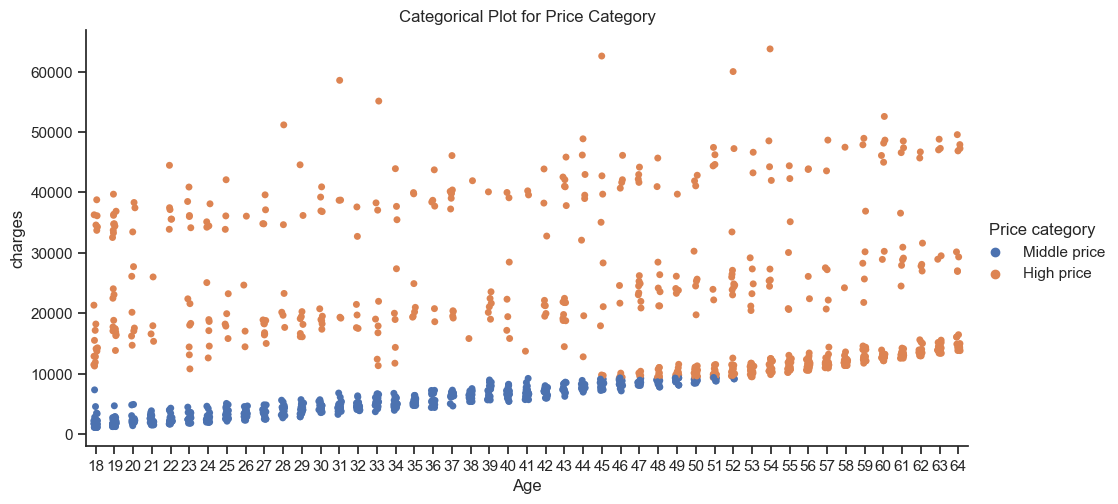

In [32]:
# Create a categorical plot 
sns.set(style='ticks')
g = sns.catplot(x='Age', y='charges', hue="Price category", data=df,aspect=2)
plt.title('Categorical Plot for Price Category') # add title

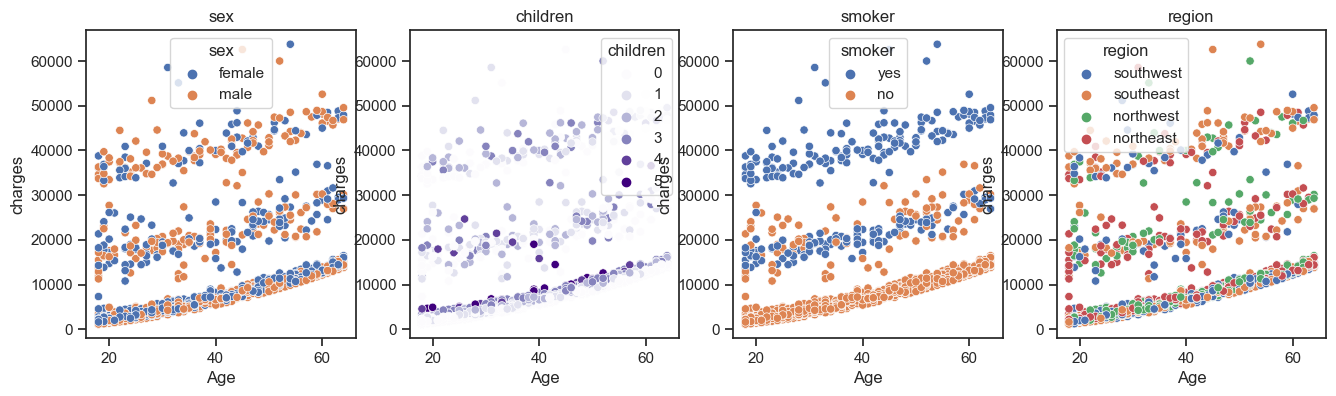

In [33]:
# Create figure and axes
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot sex
sns.scatterplot(x="Age", y="charges", hue="sex", data=df, ax=axes[0])
axes[0].set_title("sex")
# Plot children
sns.scatterplot(x="Age", y="charges", hue="children", palette="Purples", data=df, ax=axes[1])
axes[1].set_title("children")
# Plot smoker
sns.scatterplot(x="Age", y="charges", hue="smoker", data=df, ax=axes[2])
axes[2].set_title("smoker")
# Plot region
sns.scatterplot(x="Age", y="charges", hue="region", data=df, ax=axes[3])
axes[3].set_title("region")
# Show plot
plt.show()

The results demonstrate **a positive correlation between age and medical costs** in the high-price category, implying that older people had lower medical expenses than younger people. This could be attributed to reasons such as improved health insurance coverage, a greater emphasis on preventative healthcare, and fewer chronic health conditions. However, **the large range of charges suggests that some people have very high or low medical expenses, which could be influenced by their specific health conditions, treatment options, or healthcare providers.** Due to variables such as higher income criteria, limited demand for certain services, and limited availability of specific treatments or facilities, the lack of data points in this high-price category shows that it may not adequately represent the larger community.

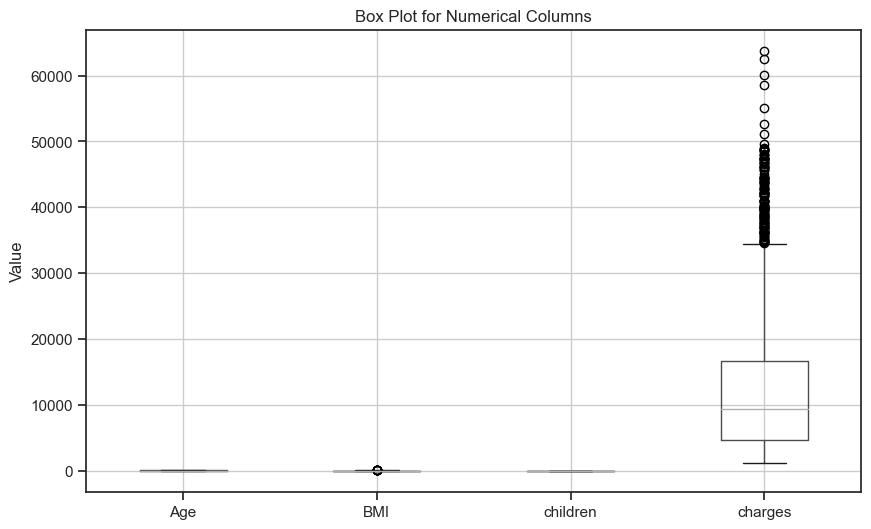

In [34]:
# Select numerical columns for the box plot
numerical_columns = ['Age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges']
       
# Create the box plot
plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title("Box Plot for Numerical Columns")
#plt.xticks(rotation=90)
plt.ylabel("Value")
plt.show()

**Outliers:** The charges variable has the **largest variation and skewness** across numerical columns, indicating that individuals have **substantial medical expenses. This could be related to factors such as age, health, and insurance coverage.** With a tiny range of values, short whiskers, and no outliers, the children variable has the least fluctuation. Most people have the same number of children, with no outliers due to factors such as family planning, social conventions, and economic standing. With a medium range of values, balanced whiskers, and few outliers above the upper whisker, the age and bmi variables show moderate variation. These variations could be attributable to genetics, lifestyle, or environmental factors.

## Hypothesis

1.There is a significant correlation between age and medical expenses.

2.There is a significant correlation between BMI and medical charges.

#### T-test for Age, BMI and Charges

In [42]:
# Select columns from the DataFrame
Age = df['Age'].values
charges = df['charges'].values
BMI = df['BMI'].values
charges = df['charges'].values

# Calculate Pearson correlation coefficient and p-value for age and medical expenses
corr_age_cost, p_value_age_cost = pearsonr(Age, charges)

# Calculate Pearson correlation coefficient and p-value for BMI and medical charges
corr_bmi_charges, p_value_bmi_charges = pearsonr(BMI, charges)

# Print the results
print('Correlation between age and charges:', corr_age_medical)
print('P-value for age and medical expenses:', p_value_age_medical)

print('Correlation between BMI and medical charges:', corr_bmi_charges)
print('P-value for BMI and medical charges:', p_value_bmi_charges)

Correlation between age and charges: 0.9859746468907017
P-value for age and medical expenses: 1.6645814933429035e-07
Correlation between BMI and medical charges: 0.19840083122624935
P-value for BMI and medical charges: 2.4680404264501376e-13


###### 1.There is a significant correlation between age and medical expenses.

The analysis found **a strong positive correlation** between age and medical expenses, with a 0.986 correlation coefficient. **The p-value (1.664) for age and medical expenses is small**, below the 0.05 significance threshold, indicating statistical significance. This suggests that **as age increases, medical expenses tend to rise.**

###### 2.There is a significant correlation between BMI and medical charges.

The analysis showed **a statistically significant moderately positive association** between BMI and medical costs, with **a p-value of 2.47e-13**. This shows that **higher BMI numbers are linked to more expensive medical bills.** The somewhat favourable connection and small p-value support the idea that higher BMI numbers are linked to more expensive medical bills.

### Explorting  dataframe

In [35]:
df.to_pickle('../Prepared Data/df_clean.pkl')

In [36]:
df.to_csv('../Prepared Data/df_clean.csv')